<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [3]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [4]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [5]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [6]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [8]:
#Calculamos el numero total de la población "n"
Barcelona['bathrooms_text']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: bathrooms_text
Non-Null Count  Dtype 
--------------  ----- 
18919 non-null  object
dtypes: object(1)
memory usage: 148.0+ KB


In [9]:
columna_como_string = Barcelona['bathrooms_text'].astype(str)

In [10]:
columna_solo_numeros = columna_como_string.replace(r'[^0-9\.]', '', regex=True)

In [11]:
Barcelona['bathrooms_numeric'] = pd.to_numeric(columna_solo_numeros, errors='coerce')

In [12]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['bathrooms_numeric'].max()
Min=Barcelona['bathrooms_numeric'].min()
Limites= [Min, Max]
Limites

[0.0, 16.0]

In [13]:
#Calculamos el rango R
R=Max-Min
R

16.0

In [14]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [15]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

1.0204225030652507

**Creación de Categorias a partir de clases**

In [16]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 16.1, 16)
intervalos

array([-0.1 ,  0.98,  2.06,  3.14,  4.22,  5.3 ,  6.38,  7.46,  8.54,
        9.62, 10.7 , 11.78, 12.86, 13.94, 15.02, 16.1 ])

In [17]:
#Creamos las categorías 
categorias= ["Categoría1 (0-1 bathrooms_numeric)", "Categoría2 (1.1-2 bathrooms_numeric)","Categoría3 (2.1-3.14 bathrooms_numeric)", "Categoría4 (3.15-4.22 bathrooms_numeric)",
             "Categoría5 (4.23-5.3 bathrooms_numeric)", "Categoría6 (5.4-6.38 bathrooms_numeric)","Categoría7 (6.39-7.46 bathrooms_numeric)", "Categoría8 (7.47-8.54 bathrooms_numeric)", "Categoría9 (8.55-9.62 bathrooms_numeric)", "Categoría10 (9.63-10.7 bathrooms_numeric)","Categoría11 (10.8-11.78 bathrooms_numeric)", "Categoría12 (11.79-12.86 bathrooms_numeric)",
             "Categoría13 (12.87-13.94 bathrooms_numeric)", "Categoría14 (13.95-15.02 bathrooms_numeric)","Categoría15 (15.03-16.1 bathrooms_numeric)"
             ]

In [18]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['bathrooms_numeric']=pd.cut(x= Barcelona['bathrooms_numeric'], bins=intervalos, labels= categorias)
Barcelona['bathrooms_numeric']

0               Categoría2 (1.1-2 bathrooms_numeric)
1               Categoría2 (1.1-2 bathrooms_numeric)
2               Categoría2 (1.1-2 bathrooms_numeric)
3               Categoría2 (1.1-2 bathrooms_numeric)
4               Categoría2 (1.1-2 bathrooms_numeric)
5               Categoría2 (1.1-2 bathrooms_numeric)
6               Categoría2 (1.1-2 bathrooms_numeric)
7               Categoría2 (1.1-2 bathrooms_numeric)
8               Categoría2 (1.1-2 bathrooms_numeric)
9               Categoría2 (1.1-2 bathrooms_numeric)
10              Categoría2 (1.1-2 bathrooms_numeric)
11              Categoría2 (1.1-2 bathrooms_numeric)
12           Categoría3 (2.1-3.14 bathrooms_numeric)
13              Categoría2 (1.1-2 bathrooms_numeric)
14              Categoría2 (1.1-2 bathrooms_numeric)
15              Categoría2 (1.1-2 bathrooms_numeric)
16              Categoría2 (1.1-2 bathrooms_numeric)
17              Categoría2 (1.1-2 bathrooms_numeric)
18              Categoría2 (1.1-2 bathrooms_nu

In [19]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['bathrooms_numeric'].value_counts().reset_index()
Tabla_freq

bathrooms_numeric  count
0          Categoría2 (1.1-2 bathrooms_numeric)  17398
1       Categoría3 (2.1-3.14 bathrooms_numeric)    688
2            Categoría1 (0-1 bathrooms_numeric)    309
3      Categoría4 (3.15-4.22 bathrooms_numeric)    228
4       Categoría5 (4.23-5.3 bathrooms_numeric)     61
5       Categoría6 (5.4-6.38 bathrooms_numeric)     39
6      Categoría8 (7.47-8.54 bathrooms_numeric)     34
7     Categoría10 (9.63-10.7 bathrooms_numeric)      8
8   Categoría12 (11.79-12.86 bathrooms_numeric)      6
9      Categoría9 (8.55-9.62 bathrooms_numeric)      3
10     Categoría7 (6.39-7.46 bathrooms_numeric)      2
11   Categoría15 (15.03-16.1 bathrooms_numeric)      2
12  Categoría13 (12.87-13.94 bathrooms_numeric)      1
13  Categoría14 (13.95-15.02 bathrooms_numeric)      1
14   Categoría11 (10.8-11.78 bathrooms_numeric)      0

In [20]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

bathrooms_numeric  count
0          Categoría2 (1.1-2 bathrooms_numeric)  17398
1       Categoría3 (2.1-3.14 bathrooms_numeric)    688
2            Categoría1 (0-1 bathrooms_numeric)    309
3      Categoría4 (3.15-4.22 bathrooms_numeric)    228
4       Categoría5 (4.23-5.3 bathrooms_numeric)     61
5       Categoría6 (5.4-6.38 bathrooms_numeric)     39
6      Categoría8 (7.47-8.54 bathrooms_numeric)     34
7     Categoría10 (9.63-10.7 bathrooms_numeric)      8
8   Categoría12 (11.79-12.86 bathrooms_numeric)      6
9      Categoría9 (8.55-9.62 bathrooms_numeric)      3
10     Categoría7 (6.39-7.46 bathrooms_numeric)      2
11   Categoría15 (15.03-16.1 bathrooms_numeric)      2
12  Categoría13 (12.87-13.94 bathrooms_numeric)      1
13  Categoría14 (13.95-15.02 bathrooms_numeric)      1

In [21]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('bathrooms_numeric')
Filtro_index

count
bathrooms_numeric                                 
Categoría2 (1.1-2 bathrooms_numeric)         17398
Categoría3 (2.1-3.14 bathrooms_numeric)        688
Categoría1 (0-1 bathrooms_numeric)             309
Categoría4 (3.15-4.22 bathrooms_numeric)       228
Categoría5 (4.23-5.3 bathrooms_numeric)         61
Categoría6 (5.4-6.38 bathrooms_numeric)         39
Categoría8 (7.47-8.54 bathrooms_numeric)        34
Categoría10 (9.63-10.7 bathrooms_numeric)        8
Categoría12 (11.79-12.86 bathrooms_numeric)      6
Categoría9 (8.55-9.62 bathrooms_numeric)         3
Categoría7 (6.39-7.46 bathrooms_numeric)         2
Categoría15 (15.03-16.1 bathrooms_numeric)       2
Categoría13 (12.87-13.94 bathrooms_numeric)      1
Categoría14 (13.95-15.02 bathrooms_numeric)      1

Text(0, 0.5, 'Frecuencia')

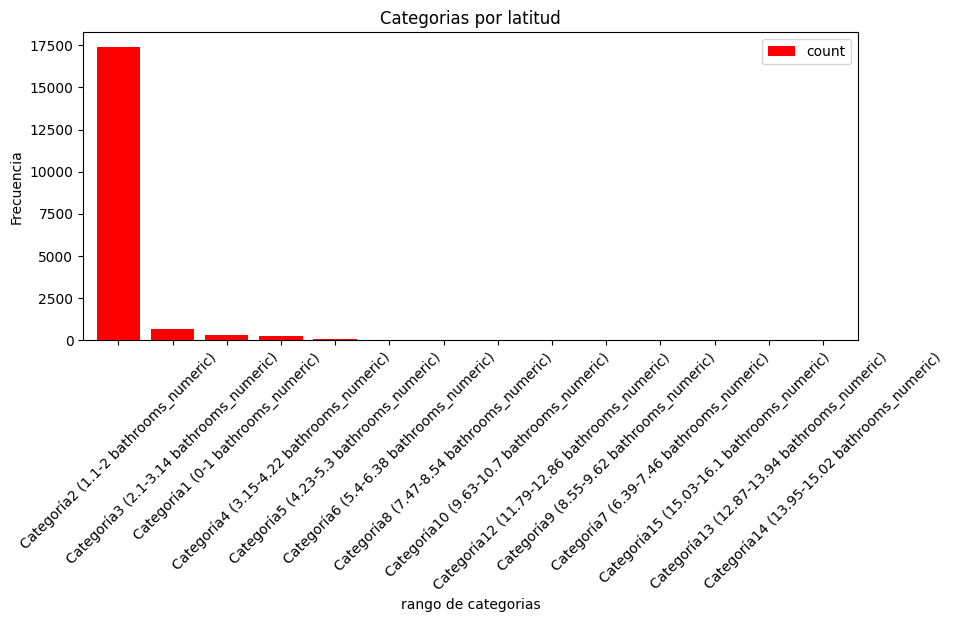

In [22]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')